In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
experiment = "GSE152558_DDS"
comparison = 'young.vs.old'

In [10]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
results_df = results_df.set_index('row')
results_df.drop(columns=['Unnamed: 0'],inplace=True)
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
ENSG00000000003.14,1836.564872,0.040705,0.248169,0.164023,0.869713,0.966883
ENSG00000000005.5,59.777090,-0.365635,0.652890,-0.560026,0.575462,0.864244
ENSG00000000419.12,780.198695,-0.823664,0.480642,-1.713673,0.086589,0.609291
ENSG00000000457.13,1329.686642,-0.343756,0.350459,-0.980872,0.326656,0.745694
ENSG00000000460.16,10370.463150,0.493421,0.288630,1.709529,0.087353,0.609291
...,...,...,...,...,...,...
ENSG00000285480.1,13.548596,-1.400323,0.830294,-1.686539,0.091692,0.611665
ENSG00000285491.1,72.833777,-0.511427,0.755875,-0.676602,0.498659,0.829777
ENSG00000285505.1,0.000000,NaN,NaN,NaN,NaN,NaN


In [24]:
ensembl_names = results_df.index
ensembl_names = ensembl_names.to_list()

['ENSG00000000003.14',
 'ENSG00000000005.5',
 'ENSG00000000419.12',
 'ENSG00000000457.13',
 'ENSG00000000460.16',
 'ENSG00000000938.12',
 'ENSG00000000971.15',
 'ENSG00000001036.13',
 'ENSG00000001084.11',
 'ENSG00000001167.14']

In [25]:
# Retrieve gene symbols
annot = sc.queries.biomart_annotations("hsapiens",
        ["ensembl_gene_id", "external_gene_name"],
        use_cache=False
    ).set_index("ensembl_gene_id")


In [29]:
ensembl_names = [item for item in ensembl_names if item.split('.')[0] in annot.index]


['ENSG00000000003.14',
 'ENSG00000000005.5',
 'ENSG00000000419.12',
 'ENSG00000000457.13',
 'ENSG00000000460.16',
 'ENSG00000000938.12',
 'ENSG00000000971.15',
 'ENSG00000001036.13',
 'ENSG00000001084.11',
 'ENSG00000001167.14']

In [31]:
results_df = results_df.query('index in @ensembl_names')

In [32]:
ensembl_names = [element.split('.')[0] for element in ensembl_names]


['ENSG00000000003',
 'ENSG00000000005',
 'ENSG00000000419',
 'ENSG00000000457',
 'ENSG00000000460']

In [33]:
# Assign gene symbols
results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]
results_df

/tmp/ipykernel_21014/2304745235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
GeneName,,,,,,,
ENSG00000000003.14,1836.564872,0.040705,0.248169,0.164023,0.869713,0.966883,TSPAN6
ENSG00000000005.5,59.777090,-0.365635,0.652890,-0.560026,0.575462,0.864244,TNMD
ENSG00000000419.12,780.198695,-0.823664,0.480642,-1.713673,0.086589,0.609291,DPM1
ENSG00000000457.13,1329.686642,-0.343756,0.350459,-0.980872,0.326656,0.745694,SCYL3
ENSG00000000460.16,10370.463150,0.493421,0.288630,1.709529,0.087353,0.609291,FIRRM
...,...,...,...,...,...,...,...
ENSG00000285480.1,13.548596,-1.400323,0.830294,-1.686539,0.091692,0.611665,H2BK1
ENSG00000285491.1,72.833777,-0.511427,0.755875,-0.676602,0.498659,0.829777,OR1Q1BP
ENSG00000285505.1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
results_df.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol.csv')

In [36]:
results_df = results_df.set_index('gene_symbol')
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,1836.564872,0.040705,0.248169,0.164023,0.869713,0.966883
TNMD,59.777090,-0.365635,0.652890,-0.560026,0.575462,0.864244
DPM1,780.198695,-0.823664,0.480642,-1.713673,0.086589,0.609291
SCYL3,1329.686642,-0.343756,0.350459,-0.980872,0.326656,0.745694
FIRRM,10370.463150,0.493421,0.288630,1.709529,0.087353,0.609291
...,...,...,...,...,...,...
H2BK1,13.548596,-1.400323,0.830294,-1.686539,0.091692,0.611665
OR1Q1BP,72.833777,-0.511427,0.755875,-0.676602,0.498659,0.829777
NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [46]:
def make_index_unique(df):
    # Create a dictionary to keep track of the counts
    counts = {}
    
    def unique_index(index):
        if index in counts:
            counts[index] += 1
            return f"{index}_{counts[index]}"
        else:
            counts[index] = 0
            return index
    
    # Apply the unique_index function to each index value
    new_index = [unique_index(idx) for idx in df.index]
    df.index = new_index


In [42]:
results_df = results_df[results_df.index.notnull()]
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,1836.564872,0.040705,0.248169,0.164023,0.869713,0.966883
TNMD,59.777090,-0.365635,0.652890,-0.560026,0.575462,0.864244
DPM1,780.198695,-0.823664,0.480642,-1.713673,0.086589,0.609291
SCYL3,1329.686642,-0.343756,0.350459,-0.980872,0.326656,0.745694
FIRRM,10370.463150,0.493421,0.288630,1.709529,0.087353,0.609291
...,...,...,...,...,...,...
TUSC2P1,4.606414,1.233203,3.037573,0.405983,0.684755,0.906582
OR4M2-OT1,52.156654,0.350378,1.390163,0.252041,0.801009,0.946768
H2BK1,13.548596,-1.400323,0.830294,-1.686539,0.091692,0.611665


In [47]:

make_index_unique(results_df)

In [51]:
results_df = results_df.dropna()
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,1836.564872,0.040705,0.248169,0.164023,0.869713,0.966883
TNMD,59.777090,-0.365635,0.652890,-0.560026,0.575462,0.864244
DPM1,780.198695,-0.823664,0.480642,-1.713673,0.086589,0.609291
SCYL3,1329.686642,-0.343756,0.350459,-0.980872,0.326656,0.745694
FIRRM,10370.463150,0.493421,0.288630,1.709529,0.087353,0.609291
...,...,...,...,...,...,...
TUSC2P1,4.606414,1.233203,3.037573,0.405983,0.684755,0.906582
OR4M2-OT1,52.156654,0.350378,1.390163,0.252041,0.801009,0.946768
H2BK1,13.548596,-1.400323,0.830294,-1.686539,0.091692,0.611665
OR1Q1BP,72.833777,-0.511427,0.755875,-0.676602,0.498659,0.829777


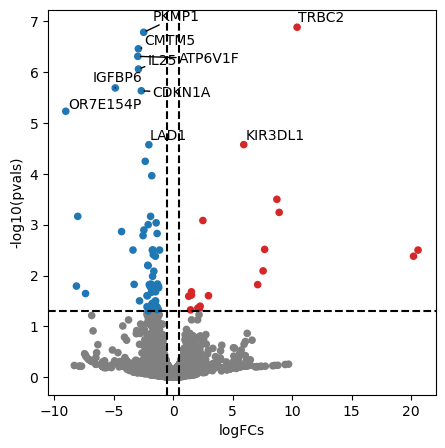

In [52]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [55]:
mat = results_df[['stat']].T.rename(index={'stat': comparison})
mat

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,OR11J6P,PDGFRL2P,POLR2J3_1,TUSC2P2,C4orf36_1,TUSC2P1,OR4M2-OT1,H2BK1,OR1Q1BP,TBCEL-TECTA
young.vs.old,0.164023,-0.560026,-1.713673,-0.980872,1.709529,1.170753,-1.066379,-0.00309,-0.676478,-1.713215,...,-0.70041,0.67451,0.183477,2.239895,0.23894,0.405983,0.252041,-1.686539,-0.676602,-2.086327


In [40]:
collectri = dc.get_collectri(organism='human', split_complexes=False)
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [56]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 27887 targets for 747 sources.


,ABL1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID1B,...,ZNF382,ZNF384,ZNF395,ZNF410,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
young.vs.old,-0.274606,-1.60357,0.602808,0.317431,-1.493913,-4.004073,-2.290868,-7.967486,-3.118344,0.094086,...,1.966645,-0.217129,0.217634,0.074068,-0.93531,-2.122822,1.860081,-2.050263,-3.202445,-0.065373


In [61]:
values = tf_acts.iloc[0]
values

ABL1      -0.274606
AHR       -1.603570
AHRR       0.602808
AIP        0.317431
AIRE      -1.493913
             ...   
ZNF699    -2.122822
ZNF76      1.860081
ZNF804A   -2.050263
ZNF91     -3.202445
ZXDC      -0.065373
Name: young.vs.old, Length: 747, dtype: float32

In [67]:
down_reg = values.sort_values(ascending=True)[:5].index.to_list()

In [68]:
up_reg = values.sort_values(ascending=False)[:5].index.to_list()

In [69]:
up_down_reg = down_reg.copy()

In [70]:
up_down_reg.extend(up_reg)
up_down_reg

['MYC',
 'TP53',
 'SP1',
 'FOXO3',
 'AR',
 'DACH1',
 'E2F5',
 'NFE2',
 'HNF1A',
 'MECP2']

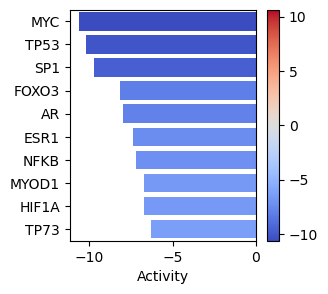

In [77]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=10,
    vertical=True,
    figsize=(3, 3)
)

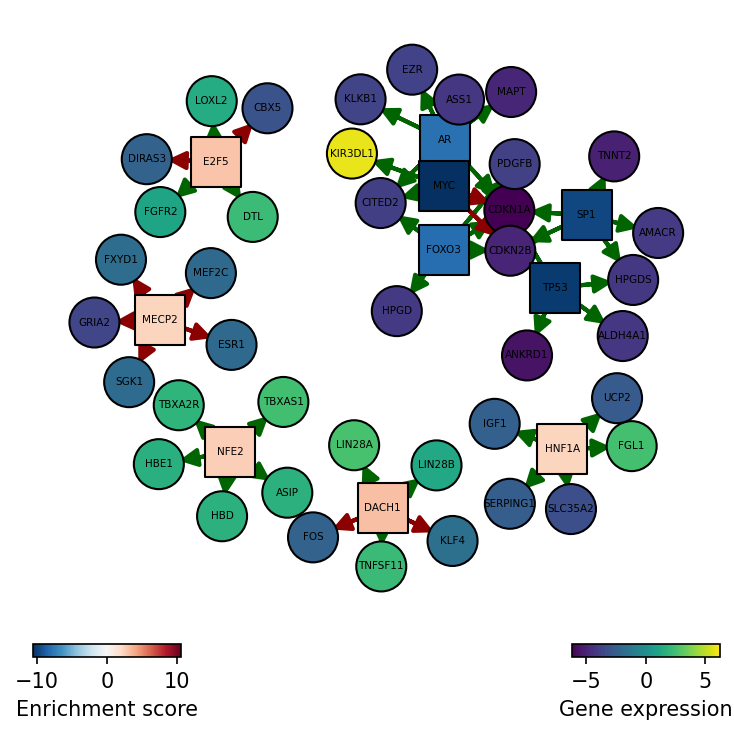

In [81]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=up_down_reg,
    n_targets=5,
    node_size=50,
    figsize=(5, 5),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_network_TF.jpg'
)

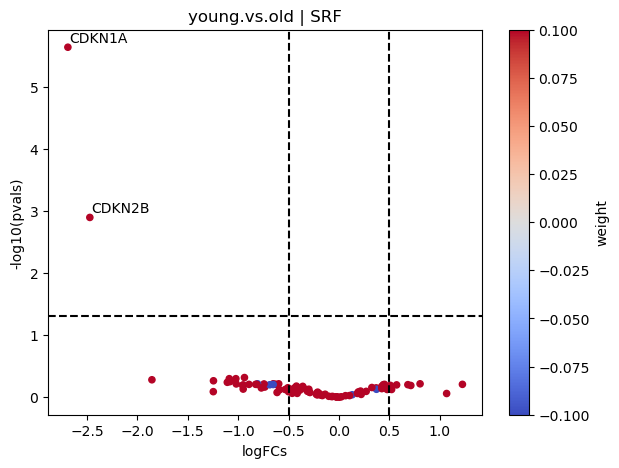

In [83]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': comparison})
pvals = results_df[['padj']].T.rename(index={'padj': comparison})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    comparison,
    name='SRF',
    net=collectri,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5
)

In [84]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [85]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 27887 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
young.vs.old,-2.802968,2.873667,0.32807,-0.925373,-1.376357,-0.474142,0.805833,4.586455,-4.638807,-0.64124,3.824171,-1.939915,1.294393,-1.342848


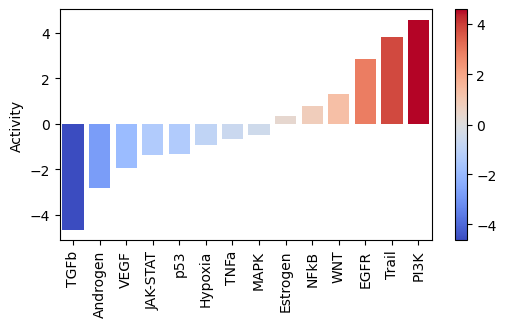

In [86]:
dc.plot_barplot(
    pathway_acts,
    comparison,
    top=25,
    vertical=False,
    figsize=(6, 3)
)

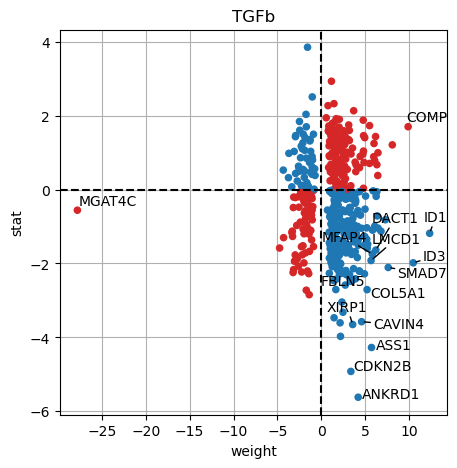

In [87]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=15)


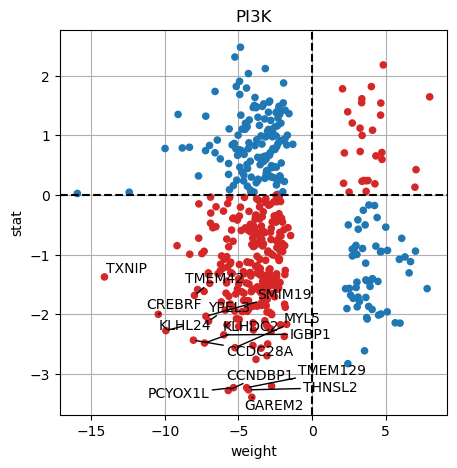

In [88]:
dc.plot_targets(results_df, stat='stat', source_name='PI3K', net=progeny, top=15)


In [89]:
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [90]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
233,MAFF,hallmark,IL2_STAT5_SIGNALING
250,MAFF,hallmark,COAGULATION
270,MAFF,hallmark,HYPOXIA
373,MAFF,hallmark,TNFA_SIGNALING_VIA_NFKB
377,MAFF,hallmark,COMPLEMENT
...,...,...,...
1449668,STXBP1,hallmark,PANCREAS_BETA_CELLS
1450315,ELP4,hallmark,PANCREAS_BETA_CELLS
1450526,GCG,hallmark,PANCREAS_BETA_CELLS
1450731,PCSK2,hallmark,PANCREAS_BETA_CELLS


In [91]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,ANDROGEN_RESPONSE,100,0.010000,0.313837,0.530074,3.986878,4.620323,HPGD
1,APOPTOSIS,161,0.012422,0.122353,0.509806,4.178408,8.778171,CDKN1A;IGFBP6
2,BILE_ACID_METABOLISM,112,0.008929,0.344242,0.530074,3.559463,3.795847,AMACR
3,DNA_REPAIR,150,0.006667,0.432021,0.530074,2.655644,2.228831,NELFE
4,E2F_TARGETS,200,0.005000,0.530074,0.530074,1.988368,1.262094,CDKN1A


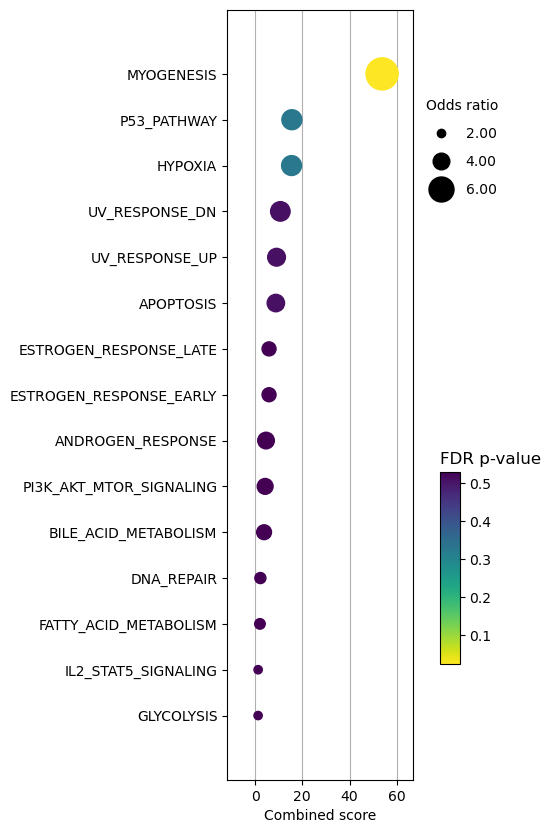

In [96]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.5,
    figsize=(3, 10)
)

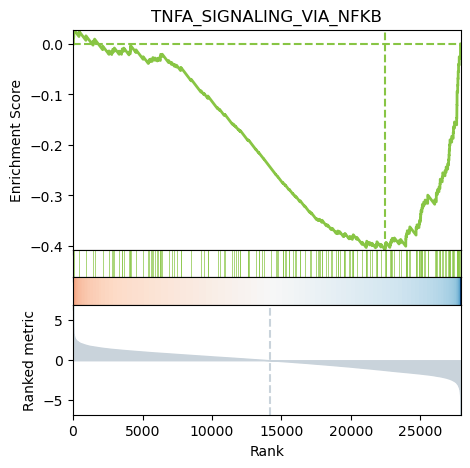

In [97]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='TNFA_SIGNALING_VIA_NFKB'
)

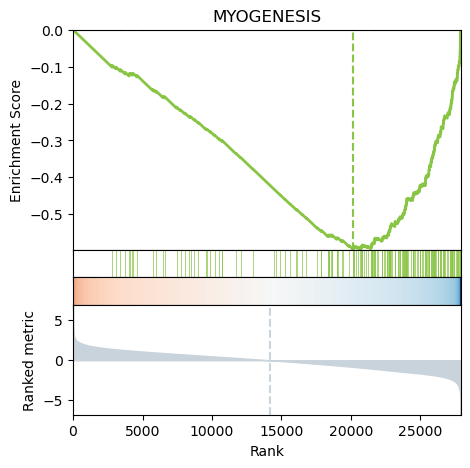

In [98]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MYOGENESIS'
)

In [99]:
import liana as ln

liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

,interaction,genes,weight
0,LGALS9&PTPRC,LGALS9,1
1,LGALS9&MET,LGALS9,1
2,LGALS9&CD44,LGALS9,1
3,LGALS9&LRP1,LGALS9,1
4,LGALS9&CD47,LGALS9,1
...,...,...,...
5775,BMP2&ACTR2,ACTR2,1
5776,BMP15&ACTR2,ACTR2,1
5777,CSF1&CSF3R,CSF3R,1
5778,IL36G&IFNAR1,IFNAR1,1


In [100]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

Running ulm on mat with 1 samples and 27887 targets for 3943 sources.


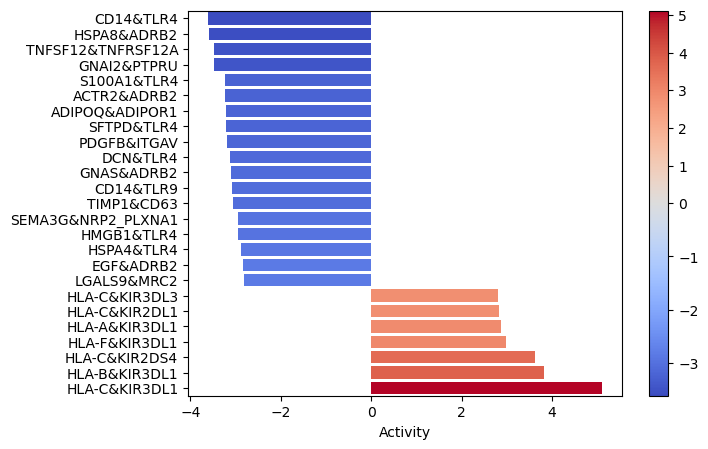

In [101]:
dc.plot_barplot(lr_score, comparison, top=25, vertical=True)
